# Hydraulic conductivity and diffusivity modelling  
## M. Vanclooster (UCL/AGRO/ELI:20/02/2017)

In this $\textit{Jupyter notebook}$,we develop an approach for modelling the unsaturated zone hydraulic conductivity and the hydraulic diffusivity. Like in previous notebooks, we do some symbolic calculations with $\textit{Sympy}$ . 

Let's first redefine the libraries that we need in this notebook. 

In [81]:
# The libraries below are the same as in the previous notebooks 
import os
import pandas as pd
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt
%matplotlib inline
from sympy import *

# Getting current directory
# cdir = 'C:/Users/vanclooster/Hubic/Documents/2018/Documents2018/cours/Hydrodynamiques des sols/Support Python'


Let's define also the symbolic variables with which we are going to work

In [82]:
h = Symbol('h')
th = Symbol('th')
alfa = Symbol('alfa')
ths = Symbol('ths')
thr = Symbol('thr')
n = Symbol('n')
m = Symbol('m')
ks = Symbol('ks')
lamb = Symbol('lamb')
se = Symbol('se')

We introduce the function for describing the unsaturated hydraulic conductivity. We use here the closed form expression proposed by (Cite Mualem1976), and succesfully combined with the van Genuchten model into a closed form expression (cite Vangenuchten80): 

\begin{equation}
    k(Se)=ks Se^{\lambda}\left( 1-\left( 1-Se^{1/m}\right)\right)^2 
\end{equation}

where ks, is the saturated hydraulic conductivity (m/s), and $\lambda$, the tortuosity factor (very often, this factor is set to 2). In this equation, we introduce also the normalised volumetrtic water content, or the degree of saturation as:

\begin{equation}
Se=\frac{\theta-\theta_r}{\theta_s-\theta_r}
\end{equation}

As in previous notebook, we can model the moisture retention relationship withe the van Genuchten model: 

\begin{equation}
    Se = \frac{1}{\left(1+(\alpha h)^n\right)^{1-1/n}}
\end{equation}

We evaluate the hydraulic conductivity model.

In [83]:
# Independent variable (pF and h (cm))
pf = np.arange(0, 7, 0.1)
h_num = 10**pf #cm!

# Hydraulic parameters
thr_num = 0.01
ths_num = 0.4
alfa_num = 0.01
n_num = 1.1
m_num = 1-1/n_num
lambda_num=0.5
ks_num=12.3 #In this case in (cm/day)

se_num = 1/(1+(alfa_num*h_num)**n_num)**(1-1/n_num)
th_num=se_num*(ths_num-thr_num)+thr_num
k_num=ks_num*se_num**(lambda_num)*( 1-( 1-se_num**(1/m_num)))**2 


Which we will evaluate graphically in terms of Se

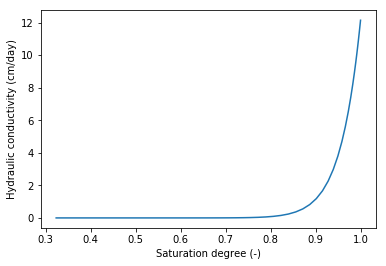

In [84]:
plt.plot(se_num,k_num);
plt.xlabel('Saturation degree (-)')
plt.ylabel('Hydraulic conductivity (cm/day)')

or in terms of h

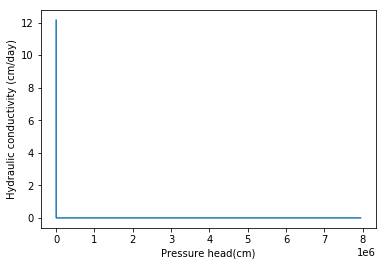

In [85]:
plt.plot(h_num,k_num);
plt.xlabel('Pressure head(cm)')
plt.ylabel('Hydraulic conductivity (cm/day)')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

or in terms of pF

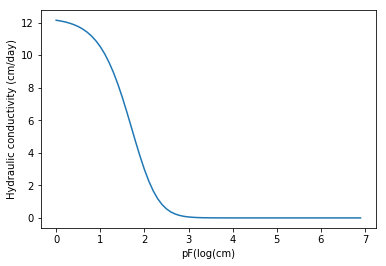

In [86]:
plt.plot(pf,k_num);
plt.xlabel('pF(log(cm)')
plt.ylabel('Hydraulic conductivity (cm/day)')

Remark, that this is a numerical evaluation of the conductivity model, as the closed form expression is given in terms of $Se$. We could also calculate first for each $\theta$ a corresponding $h$, following the inverse water retention relationship. This inverse relationship can easily be found using the $solve$ algorithm in $Sympy$ as illustrated below: 

In [87]:
solve(th - thr+(ths-thr)/((1+(alfa*h)**n)**(1-1/n)),h)

[(-1 + ((th - thr)/(thr - ths))**(-n/(n - 1)))**(1/n)/alfa]

Hence, we obtain our soil moisture retention curve in the $h(\theta)$ format as follows

\begin{equation}
    h(\theta)=\frac{(-1 + ((\theta - \theta_r)/(\theta_r - \theta_s))^{-n/(n - 1)})^{1/n}}{\alpha}
\end{equation}

Subsequently, we calculate for each water content K and plot it in terms of the calculated h. This would of course yield exactly the same results.

Finally, we introduce the differential moisture capacity. This is by definition $D=K/C$. In previous notebook, we obtained an expression of C(h):

\begin{equation}
    C(h)=\frac{n(\alpha h)^{n}(-1 + 1/n)(-\theta_{r} + \theta_{s})((\alpha h)^{n} + 1)^{(-1 + 1/n)}}{h((\alpha h)^{n} + 1)}
\end{equation}

Introducing now $h(\theta)$ in this equation will yield an expression of $C(\theta)$. Combining this with $k(\theta)$ will yield the diffusivity in terms of soil water content $D(\theta)$. This will become a long expression. Hence, it is better to evaluate the diffusivity numerically. Recalculate for the previous given parametrization the capacity:

In [90]:
c_num=-n_num*(alfa_num*h_num)**n_num*(-1 + 1/n_num)*(-thr_num + ths_num)*((alfa_num*h_num)**n_num + 1)**(-1 + 1/n_num)/(h_num*((alfa_num*h_num)**n_num + 1))

And calculate now the diffusivity

In [91]:
d_num=k_num/c_num

which we can evaluate graphically

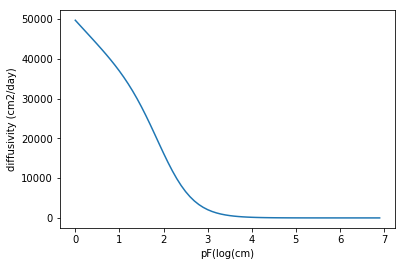

In [92]:
plt.plot(pf,d_num);
plt.xlabel('pF(log(cm)')
plt.ylabel('diffusivity (cm2/day)')